# Extraction of articulation features from audio files

Compute articulation features from continuous speech.

122 descriptors are computed:

- 1 - 22. Bark band energies in onset transitions (22 BBE).
- 23 - 34. Mel frequency cepstral coefficients in onset transitions (12 MFCC onset)
- 35 - 46. First derivative of the MFCCs in onset transitions (12 DMFCC onset)
- 47 - 58. Second derivative of the MFCCs in onset transitions (12 DDMFCC onset)
- 59 - 80. Bark band energies in offset transitions (22 BBE).
- 81 - 92. MFCCC in offset transitions (12 MFCC offset)
- 93 - 104. First derivative of the MFCCs in offset transitions (12 DMFCC offset)
- 105 - 116. Second derivative of the MFCCs in offset transitions (12 DMFCC offset)
- 117 First formant Frequency
- 118 First Derivative of the first formant frequency
- 119 Second Derivative of the first formant frequency
- 120 Second formant Frequency
- 121 First derivative of the Second formant Frequency
- 122 Second derivative of the Second formant Frequency

In addition, static (for all utterance) or dynamic (at-frame level) features can be computed:

- The static feature vector is formed with 488 features (122 descriptors) x (4 functionals: mean, std, skewness, kurtosis)

- The dynamic matrix contains 58 descriptors (22 BBEs, 12 MFCC, 12DMFCC, 12 DDMFCC ) computed for frames of 40 ms of onset segments.

The first two frames of each recording are not considered for dynamic analysis to be able to stack the derivatives of MFCCs

#### Notes:
1. The fundamental frequency is computed the PRAAT algorithm. To use the RAPT method,  change the "self.pitch method" variable in the class constructor.

2. The formant frequencies are computed using Praat

3. The audio file needs to be specified with full path (TSv)

4. The praat script FormantsPraat.praat needed two modifications (TSv)
    - all variables must have initial lowercase character
    - the command for saving the results needed to be updated ('Write to' -> 'Save as')

In [1]:
import sys
sys.path.append("../")
import os
os.environ['KALDI_ROOT']=os.environ['HOME']+'/kaldi-2020'
from disvoice.articulation.articulation import Articulation
from IPython.display import Audio

In [2]:
articulationf=Articulation()

#### Note! Needs full path to the audio file

In [3]:
file_audio=os.environ['HOME']+'/DisVoice/audios/001_ddk1_PCGITA.wav'
Audio(file_audio,autoplay=False)

## Extract features and return them as a numpy array

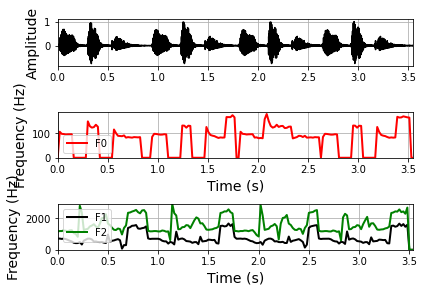

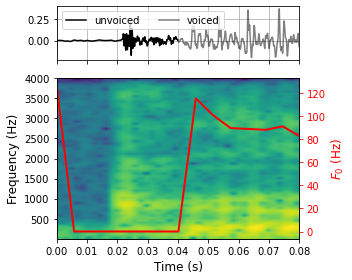

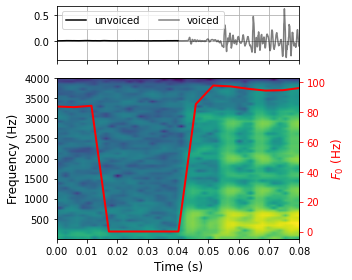

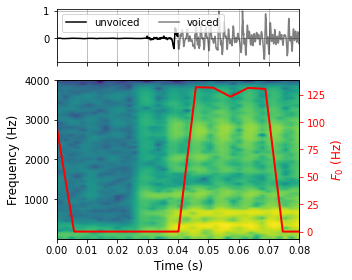

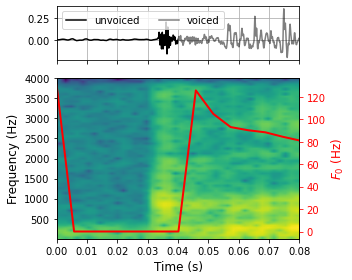

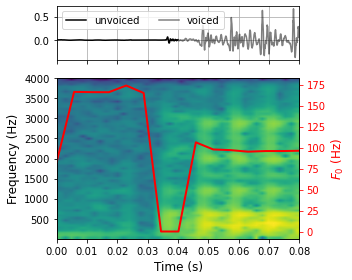

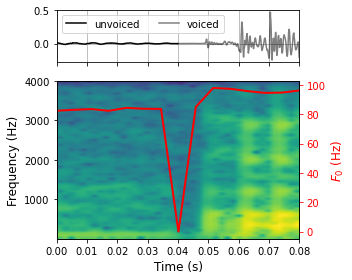

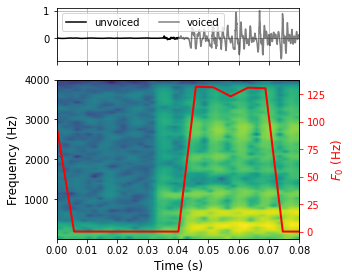

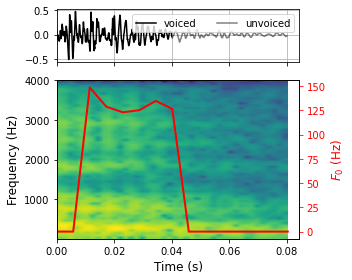

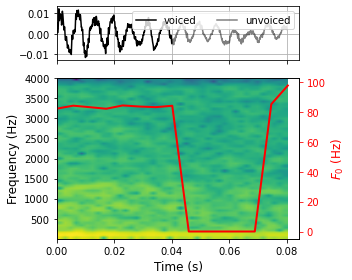

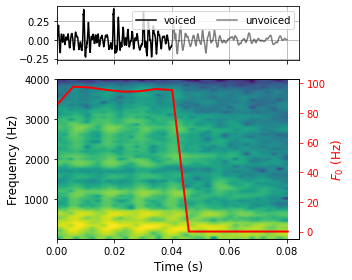

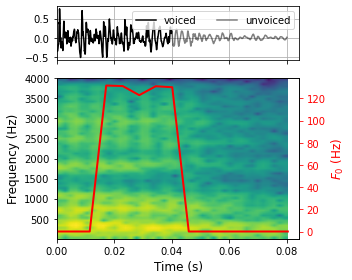

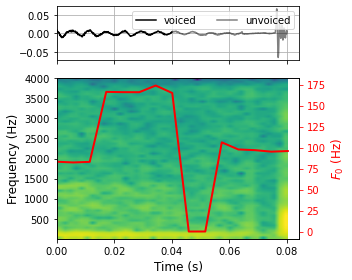

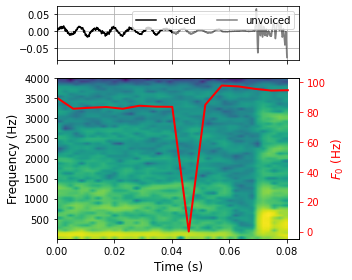

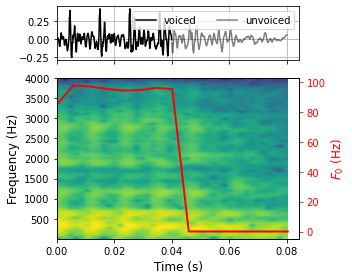

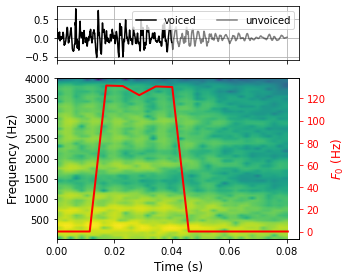

(1, 488)


In [9]:
features1=articulationf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")
print(features1.shape)

## Extract static features and return them as a dataframe 

In [5]:
features1=articulationf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

   avg BBEon_1  avg BBEon_2  avg BBEon_3  avg BBEon_4  avg BBEon_5  \
0    -2.620866    -1.807075     -2.14389    -2.467274    -2.434698   

   avg BBEon_6  avg BBEon_7  avg BBEon_8  avg BBEon_9  avg BBEon_10  ...  \
0    -2.911106    -3.353367    -3.974112    -4.202167     -4.076159  ...   

   kurtosis DDMFCCoff_9  kurtosis DDMFCCoff_10  kurtosis DDMFCCoff_11  \
0             -1.041752               0.619084               -0.75637   

   kurtosis DDMFCCoff_12  kurtosis F1  kurtosis DF1  kurtosis DDF1  \
0               0.595668     0.314205     10.686429       3.761416   

   kurtosis F2  kurtosis DF2  kurtosis DDF2  
0    -0.696922     11.187812        6.63038  

[1 rows x 488 columns]


## Extract dynamic features and return them as a dataframe

In [6]:
features1=articulationf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1.head())

    BBEon_1   BBEon_2   BBEon_3   BBEon_4   BBEon_5   BBEon_6   BBEon_7  \
0 -1.372197 -0.033660  0.279116  0.216859  1.345059  1.466043  0.073564   
1 -3.371331 -2.639230 -3.093478 -3.149662 -2.847807 -4.176184 -4.755112   
2 -2.597456 -1.633967 -1.925059 -1.228437 -0.557626 -1.673530 -2.889895   
3 -1.223124 -0.384179 -0.070074 -0.675369  0.531350 -0.841073 -0.584536   
4 -3.155692 -3.242846 -3.873316 -4.740832 -5.655081 -6.028498 -6.120387   

    BBEon_8   BBEon_9  BBEon_10  ...  DDMFCCon_3  DDMFCCon_4  DDMFCCon_5  \
0 -0.661689 -0.515421  0.504802  ...    5.545155    6.685234   -6.844475   
1 -6.344404 -7.089428 -7.238274  ...   32.522557   25.072857   -4.218876   
2 -2.371588 -2.019066 -1.995731  ...  -30.873466  -31.441206    2.314444   
3 -1.505295 -2.308978 -2.081991  ...   -2.201797    6.633414    4.856481   
4 -6.344579 -6.066887 -6.626370  ...   23.464894   -2.651206   -1.830673   

   DDMFCCon_6  DDMFCCon_7  DDMFCCon_8  DDMFCCon_9  DDMFCCon_10  DDMFCCon_11  \
0   11.108974

## Extract dynamic features and return them as a torch tensor

In [7]:
features1=articulationf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

torch.float64
torch.Size([25, 58])


## Extract static features from a path return them as a numpy array

In [8]:
path_audio="/home/ansatte/torbjorn/DisVoice/audios/"
features1=articulationf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 098_u1_PCGITA.wav: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]      

(4, 488)
